In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import train_test_split

/Library/Python/2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# pd.read_csv?
# plt.text?
# train_test_split?
# np.argsort?
# np.bincount?

In [3]:
train_df = pd.read_csv('../../data/mnist/train.csv')

In [4]:
train_labels = train_df.loc[:, 'label']

In [5]:
train_images = train_df.loc[:, 'pixel0':] 

In [6]:
train_labels = np.array(train_labels)

In [7]:
train_images = np.array(train_images)

In [8]:
train_labels_0 = train_labels[0]

In [9]:
train_images_0 = train_images[0, :]

In [10]:
train_images_0_28x28 = train_images_0.reshape((28, 28))

('label:', 1)


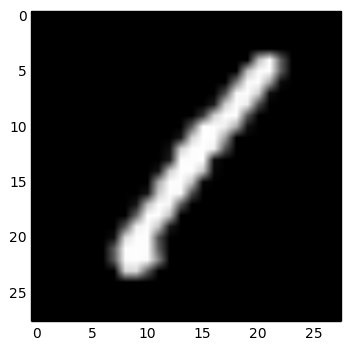

In [11]:
plt.imshow(train_images_0_28x28, cmap='gray')
print('label:', train_labels_0)

In [12]:
# 使用sklearn中的train_test_split分割数据集
train_images_norm = train_images/255.0-0.5
X_train, X_test, y_train, y_test = train_test_split(train_images_norm, train_labels, test_size=0.33, random_state=42)

In [13]:
def knn(X_input, k):
    distances = []
    for X_train_sample in X_train:
        distance = sum((X_input-X_train_sample)*(X_input-X_train_sample))
        distances.append(distance)
    distances_np = np.array(distances)
    distances_np_sort = np.argsort(distances_np)
    k_indices = distances_np_sort[:k]
    k_y_train = y_train[k_indices]
    k_y_train_bin = np.bincount(k_y_train)
    y_input = np.argmax(k_y_train_bin)
    return y_input

In [14]:
test_right_count = 0

for test_sample_index, X_test_sample in enumerate(X_test):
#     print(test_sample_index)
    if test_sample_index==50:
        break
    y_test_sample = y_test[test_sample_index]
    y_test_sample_predict = knn(X_test_sample, 5)
    if y_test_sample_predict==y_test_sample:
        test_right_count += 1
test_count = test_sample_index+1
print('test_acc:', test_right_count*1.0/test_count)

('test_acc:', 0.9803921568627451)
